<a href="https://colab.research.google.com/github/kumarirakhi19/NYC-Taxi-Trip-Time-Prediction-/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [50]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
sns.set()
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/NYC Taxi Data.csv'

In [4]:
nyc_df = pd.read_csv(path)

In [5]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
nyc_df.shape

(1458644, 11)

In [6]:
##Check count of unique id's in the dataset
nyc_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique id's in Training dataset, which is equal to the number of records

In [7]:
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There is no NaN/NULL record in the dataset, So we dont have to impute any record.

In [8]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [9]:
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

In [10]:
nyc_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [11]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()

In [13]:
nyc_df['pickup_day_no']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['dropoff_day_no']=nyc_df['dropoff_datetime'].dt.weekday

In [14]:
nyc_df['pickup_hour']=nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']=nyc_df['dropoff_datetime'].dt.hour

In [15]:
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month

In [16]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [51]:
nyc_df['pickup_time_of_day']=nyc_df['pickup_datetime'].apply(lambda x :time_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
nyc_df['dropoff_time_of_day']=nyc_df['dropoff_datetime'].apply(lambda x :time_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [17]:
nyc_df['pickup_timeofday']=nyc_df['pickup_hour'].apply(time_of_day)
nyc_df['dropoff_timeofday']=nyc_df['dropoff_hour'].apply(time_of_day)

In [18]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,19,19,4,4,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon


In [19]:
nyc_df['duration_trip'] = nyc_df['dropoff_datetime']-nyc_df['pickup_datetime']

In [20]:
nyc_df['duration_trip']

0         0 days 00:07:35
1         0 days 00:11:03
2         0 days 00:35:24
3         0 days 00:07:09
4         0 days 00:07:15
                ...      
1458639   0 days 00:12:58
1458640   0 days 00:10:55
1458641   0 days 00:12:44
1458642   0 days 00:06:13
1458643   0 days 00:03:18
Name: duration_trip, Length: 1458644, dtype: timedelta64[ns]

In [21]:
from geopy.distance import great_circle

In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

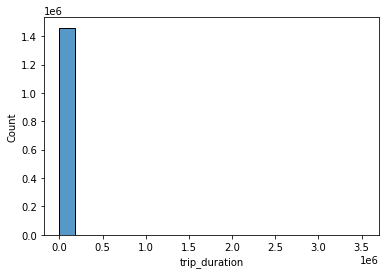

In [22]:
sns.histplot(nyc_df['trip_duration'],kde=False,bins=20)

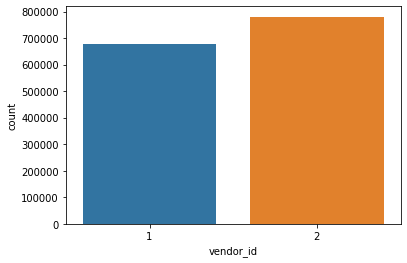

In [23]:
sns.countplot(x='vendor_id',data=nyc_df)

In [24]:
nyc_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

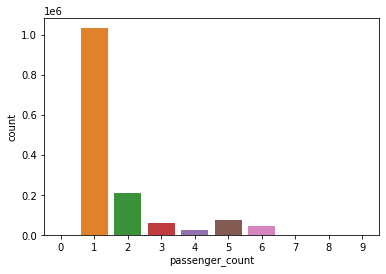

In [25]:
sns.countplot(x='passenger_count',data=nyc_df)

In [26]:
nyc_df=nyc_df[nyc_df['passenger_count']!=0]
nyc_df=nyc_df[nyc_df['passenger_count']<=5]

In [27]:
nyc_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
4      28404
Name: passenger_count, dtype: int64

In [28]:
nyc_df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994297
Y    0.005703
Name: store_and_fwd_flag, dtype: float64

In [33]:
nyc_df['pickup_day'].value_counts()

Friday       216106
Saturday     213319
Thursday     211295
Wednesday    203263
Tuesday      195988
Sunday       188888
Monday       181387
Name: pickup_day, dtype: int64

In [34]:
nyc_df['dropoff_day'].value_counts()

Friday       215638
Saturday     213358
Thursday     210487
Wednesday    202911
Tuesday      195769
Sunday       190674
Monday       181409
Name: dropoff_day, dtype: int64

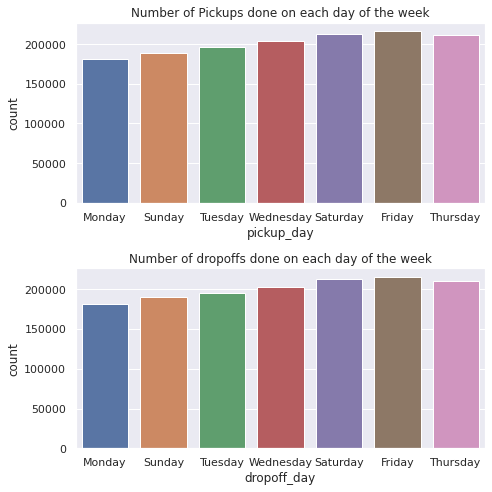

In [45]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(7,7))
sns.countplot(x='pickup_day',data=nyc_df,ax=ax[0])

ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df,ax=ax[1])

ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

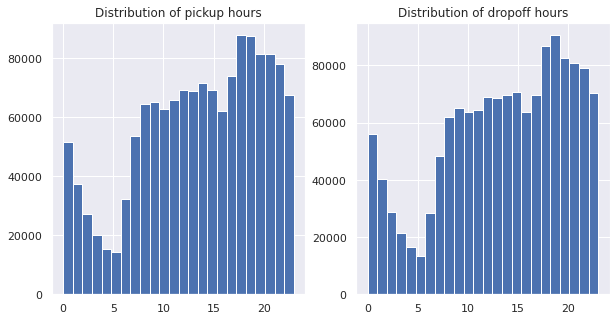

In [57]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
nyc_df['pickup_hour']=nyc_df['pickup_datetime'].dt.hour
nyc_df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
nyc_df['dropoff_hour']=nyc_df['dropoff_datetime'].dt.hour
nyc_df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

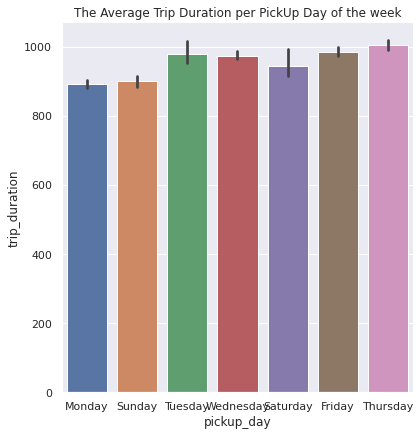

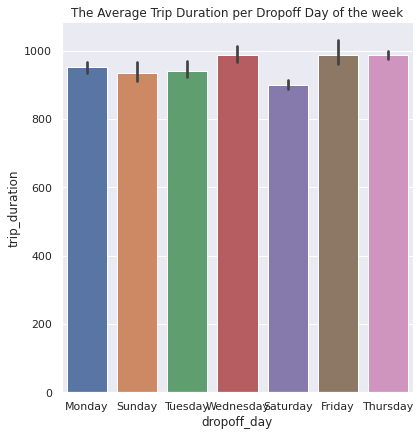

In [59]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=nyc_df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=nyc_df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

In [60]:
ax1=nyc_df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

KeyError: ignored

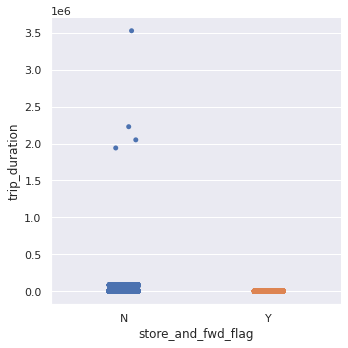

In [61]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=nyc_df)

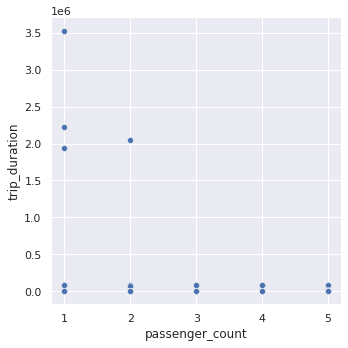

In [62]:
sns.relplot(x="passenger_count", y="trip_duration", data=nyc_df, kind="scatter")

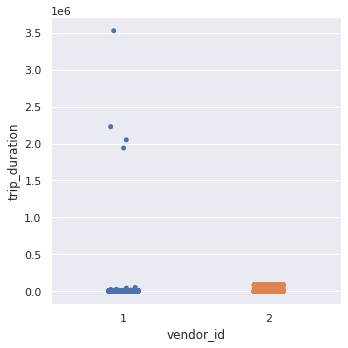

In [63]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=nyc_df)